# Project: Leicester City Premier League Championship Season Analysis(2015/2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
## Defying All Odds
In 2015/2016 season in the English Premier League soccer , Leicester City FC (LCFC) pulled off one of the greatest and storied tales by becoming the champions of England. At the begining of the season, the British bet masters ranked Leicester City FC 's chance of winning the league at 5000/1. It 's statistically near impossible for the team to be champions. But against all odds Leicester was crowned the English champions that season.

In order to deepen my investigation as to how the team became the winners, I came up with some questions that can facilitate the path to data analysis. Here are the questions:
* *Did the away or home games propelled the team to win the Premier League?*
* *Was the team offensively or defensively strong to clinch the title?*


The goal of this project is to analyze the numbers that contributed to the success of the LCFC. I will look at all games(both home and away) and see how the team achieved such an unlikely outcome. The <a href='https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite&sa=D&ust=1532469042122000'> dataset </a> that I will analyze is from the Kaggle website.





### Import Data Science Libraries

 First, I need to import all the required libraries using Python

In [1455]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
from sqlalchemy import create_engine,Table, MetaData, event, select
import seaborn as sns
import collections



<a id='wrangling'></a>
# Data Wrangling

### Connecting to SQLite
Since the dataset is stored in SQLite, I must connect to the database to retrieve the dataset for analyses

In [1456]:
# Connecting and printing the entire leagues stored in the database
with sql.connect('soccer.sqlite')as conn:
    df = pd.read_sql('SELECT name FROM league', conn)
    print(df)

                        name
0     Belgium Jupiler League
1     England Premier League
2             France Ligue 1
3      Germany 1. Bundesliga
4              Italy Serie A
5     Netherlands Eredivisie
6         Poland Ekstraklasa
7   Portugal Liga ZON Sagres
8    Scotland Premier League
9            Spain LIGA BBVA
10  Switzerland Super League


In [1457]:
# Looking at the table columns
database = create_engine('sqlite:///soccer.sqlite')
connection = database.connect()
query = database.table_names()
query

['Country',
 'League',
 'Match',
 'Player',
 'Player_Attributes',
 'Team',
 'Team_Attributes',
 'sqlite_sequence']

### Selecting Country and League

In [1458]:
# Selecting the match column from the table columns
df = pd.read_sql_table('Match',database)
df.columns[:11]

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

The database contains data from all the European leagues but the area of my analysis is one team in one country and one league. So in my case I selected the English Premier League(EPL) where Leicester City FC(LCFC) is located. I therefore need to specify my dataset so that I can clean, analyze,transform, and interpret the results.

Below I selected the EPL from the huge data set by identifying *country_id* of 1729 which is England Premier League.

In [1459]:
epl = df[df['country_id'] == 1729]
epl.head(5) # Printing the first five rows

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75


### Cleaning the datasets

I further specify the columns that I need for data analyses and assigned variable *epl_cleaned* to indicate that the dataset is clean and ready to be used to answer questions. In order to accomplish that, I have to select the columns that are relevant to the questions at hand and drop the rest of the columns that are not important for my research.

In [1460]:
# Selection of relevant columns from the dataset
epl_cleaned = epl[['league_id','season','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
epl_cleaned.index=range(1,3041)
epl_cleaned

,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
1,1729,2008/2009,2008-08-17 00:00:00,489042,10260,10261,1,1
2,1729,2008/2009,2008-08-16 00:00:00,489043,9825,8659,1,0
3,1729,2008/2009,2008-08-16 00:00:00,489044,8472,8650,0,1
4,1729,2008/2009,2008-08-16 00:00:00,489045,8654,8528,2,1
5,1729,2008/2009,2008-08-17 00:00:00,489046,10252,8456,4,2
...,...,...,...,...,...,...,...,...
3036,1729,2015/2016,2015-10-17 00:00:00,1988795,8466,8197,2,2
3037,1729,2015/2016,2015-10-19 00:00:00,1988796,10003,10194,0,1
3038,1729,2015/2016,2015-10-17 00:00:00,1988797,8586,8650,0,0
3039,1729,2015/2016,2015-10-17 00:00:00,1988798,9817,9825,0,3


In [1461]:
# Information about the dataframe
epl_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 1 to 3040
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_id         3040 non-null   int64 
 1   season            3040 non-null   object
 2   date              3040 non-null   object
 3   match_api_id      3040 non-null   int64 
 4   home_team_api_id  3040 non-null   int64 
 5   away_team_api_id  3040 non-null   int64 
 6   home_team_goal    3040 non-null   int64 
 7   away_team_goal    3040 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 190.1+ KB


In [1417]:
# Transforming the dataset
epl_cleaned2 = epl_cleaned.copy()
epl_cleaned2.index.names=['Game']
epl_cleaned2['date'] = pd.to_datetime(epl_cleaned2['date'])# Changed the date column to datetime dtype
epl_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 1 to 3040
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   league_id         3040 non-null   int64         
 1   season            3040 non-null   object        
 2   date              3040 non-null   datetime64[ns]
 3   match_api_id      3040 non-null   int64         
 4   home_team_api_id  3040 non-null   int64         
 5   away_team_api_id  3040 non-null   int64         
 6   home_team_goal    3040 non-null   int64         
 7   away_team_goal    3040 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 190.1+ KB


Check to make sure there are no missing values in the dataset.

In [968]:
epl_cleaned2.isnull().sum()

league_id           0
season              0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

### Choosing The Team of My Interest

The next step is to choose the team of my interest which is Leicester City FC. Since there are 38 matches in a single season that a team in the Premier League plays(19 home games and 19 away games), I categorized the games by home and away  and cleaned the dataset as needed.

### The Home Games
Leicester City FC played 19 home games throughout the 2015/2016 season. The table below shows all the 19 home games and the results.

In [1343]:
lfc_home_game = epl_cleaned2[(epl_cleaned2['home_team_api_id'] == 8197 )& (epl_cleaned2['season'] =='2015/2016')].sort_values(by='match_api_id', ascending=True)
lfc_home_game.index=range(1,20)# changed the index to games played at home that range from 1-19
lfc_home_game.index.names=['Match No.']
lfc_home_game

,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
Match No.,,,,,,,,
1,1729,2015/2016,2015-08-08,1987036,8197,8472,4,2
2,1729,2015/2016,2015-08-22,1988733,8197,8586,1,1
3,1729,2015/2016,2015-09-13,1988753,8197,10252,3,2
4,1729,2015/2016,2015-09-26,1988770,8197,9825,2,5
5,1729,2015/2016,2015-10-24,1988803,8197,9826,1,0
6,1729,2015/2016,2015-11-07,1988823,8197,9817,2,1
7,1729,2015/2016,2015-11-28,1988843,8197,10260,1,1
8,1729,2015/2016,2015-12-14,1988863,8197,8455,2,1
9,1729,2015/2016,2015-12-29,1988893,8197,8456,0,0


In [1454]:
# Verifying no missing values in the dataset
lfc_home_game.isnull().sum()

league_id           0
season              0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

### The Away Games
The away games LCFC played sorted below.

In [1345]:
lfc_away_games= epl_cleaned2[(epl_cleaned2['away_team_api_id'] == 8197 )& (epl_cleaned2['season'] =='2015/2016')].sort_values(by='date', ascending=True)
lfc_away_games.index=range(1,20)# changed the index to games played away from home that range from 1-19
lfc_away_games.drop(columns=['league_id'])


,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
1,2015/2016,2015-08-15,1987087,8654,8197,1,2
2,2015/2016,2015-08-29,1988741,8678,8197,1,1
3,2015/2016,2015-09-19,1988767,10194,8197,2,2
4,2015/2016,2015-10-03,1988787,9850,8197,1,2
5,2015/2016,2015-10-17,1988795,8466,8197,2,2
6,2015/2016,2015-10-31,1988819,8659,8197,2,3
7,2015/2016,2015-11-21,1988834,10261,8197,0,3
8,2015/2016,2015-12-05,1988857,10003,8197,0,3
9,2015/2016,2015-12-19,1988872,8668,8197,2,3
10,2015/2016,2015-12-26,1988883,8650,8197,1,0


In [1348]:
# Verifying no missing values in the dataset
lfc_away_games.isnull().sum()

league_id           0
season              0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [1419]:
# Information about the dataframe
lfc_away_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   league_id         19 non-null     int64         
 1   season            19 non-null     object        
 2   date              19 non-null     datetime64[ns]
 3   match_api_id      19 non-null     int64         
 4   home_team_api_id  19 non-null     int64         
 5   away_team_api_id  19 non-null     int64         
 6   home_team_goal    19 non-null     int64         
 7   away_team_goal    19 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.3+ KB


<a id='eda'></a>
# Explotary Data Analysis

## Statistical Analysis of The Games
Once the data sets are cleaned and organized, the next step is to perform statistical analyses of home and away games to find the answers to the questions. In my case, I will find the **mean,median, mode**, and the **standard deviation** of all games  LCFC played in terms of the goals scored in each game both at home and away.

## Question 1: Did the away or home games propelled the team to win the Premier League?

### Home and Away Goals Stats and Observations
Leicester City's amazing season was equally impressive both at home and away as they scored nearly identical number of goals at home and away from home. Even though the margin of goal differences is a mere 2 as indicated by the plots below,the team appeared to be consistent throughout the season and therefore it is hard to conclude whether the away or home form was the deciding factor in the team's path to glory.

<!-- When the frequency of goals scored at home is visualized using a histogram, Leicester City FC scored 6 games 1 goal and 6 games 2 goals. That indicates that the team's winning margin at home is close to 2 goals per game and this is supported by the mean of the total goals scored at home which is 1.84 and the median is 2.0. Even though the use of the mean value is sometimes not a good statistical approach as it is prone outliers influence, but in this case when both the mean and the median values are compared, they are approximately equal. -->

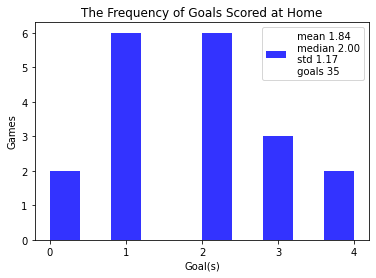

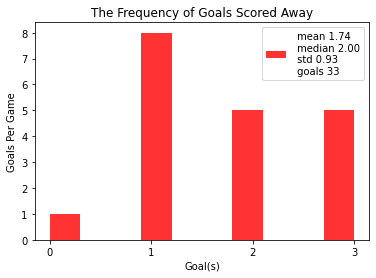

In [1351]:
# Calculating the statistics of goals scored at home
home_goals = lfc_home_game['home_team_goal']
mean = home_goals.mean()
median = home_goals.median()
std = home_goals.std()
goals_total = home_goals.sum()
stats = f' mean {mean:.2f}\n median {median:.2f}\n std {std:.2f}\n goals{goals_total: }'

# Plotting goals scored at home
home_goals.plot.hist(color = 'b', alpha = 0.8, label= stats)
plt.xlabel('Goal(s)')
plt.xticks(range(0, 5))
plt.ylabel('Games')
plt.title('The Frequency of Goals Scored at Home')
plt.legend()
plt.show()

# Calculating the statistics of goals scored away
away_goals = lfc_away_games['away_team_goal']
mean_away = away_goals.mean()
median_away = away_goals.median()
std_away = away_goals.std()
away_goals_total = away_goals.sum()
stats_away = f' mean {mean_away:.2f}\n median {median_away:.2f}\n std {std_away:.2f}\n goals{away_goals_total: }'

# Plotting the goals scored away
away_goals.plot.hist(color = 'r', alpha = 0.8, label=stats_away)
plt.xlabel('Goal(s)')
plt.xticks(range(0, 4))
plt.ylabel('Goals Per Game')
plt.title('The Frequency of Goals Scored Away')
plt.legend()
plt.show()



## Question 2: Was the team offensively or defensively strong to clinch the title?
To be a champion in soccer, a team  has to perform supremely on every level. Despite the expectations, any team vying to win a championship must overcome its achille's heel by either improving defensively or offensively.
In the case of Leicester City FC, analyzing home and away wins might shed some lights on how they performed in those two areas. I will investigate how many goals did the team concede and score to find answers to the question.

### Observations
Of the 23 wins of the season, the team was able to win 13 games without letting in any goals from the other teams as the data indicate. This shows that team was defensively perfoming better during that season.



### Comparison between home and away games

In [1353]:
# Display the whole season matches the team played
lfc_season = [lfc_home_game,lfc_away_games]
lfc = pd.concat(lfc_season)
lfc = lfc.sort_values(by='date', ascending=True)
lfc.index=range(1,39)# Changed the index to match the number of games played
lfc.index.names=['Match No.'] # Changed the index to matches played during the season
lfc

,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
Match No.,,,,,,,,
1,1729,2015/2016,2015-08-08,1987036,8197,8472,4,2
2,1729,2015/2016,2015-08-15,1987087,8654,8197,1,2
3,1729,2015/2016,2015-08-22,1988733,8197,8586,1,1
4,1729,2015/2016,2015-08-29,1988741,8678,8197,1,1
5,1729,2015/2016,2015-09-13,1988753,8197,10252,3,2
6,1729,2015/2016,2015-09-19,1988767,10194,8197,2,2
7,1729,2015/2016,2015-09-26,1988770,8197,9825,2,5
8,1729,2015/2016,2015-10-03,1988787,9850,8197,1,2
9,1729,2015/2016,2015-10-17,1988795,8466,8197,2,2


In [1400]:
# Filtered the dataset to check the team wins at home
lfc_home_win = lfc_home_game[lfc_home_game['home_team_goal'] > lfc_home_game['away_team_goal']].sort_values(by='match_api_id', ascending=True)
# lfc_home_win.set_index(keys='match_api_id', inplace=True)
lfc_home_win.drop(columns=['league_id','season','date','home_team_api_id','away_team_api_id','match_api_id'], inplace=True)
lfc_home_win.style.hide_index()

home_team_goal,away_team_goal
4,2
3,2
1,0
2,1
2,1
3,0
2,0
1,0
1,0
1,0


In [1401]:
# Stats about the home wins
lfc_home_win.describe()

,home_team_goal,away_team_goal
count,12.00000,12.000000
mean,2.25000,0.583333
std,1.13818,0.792961
min,1.00000,0.000000
25%,1.00000,0.000000
50%,2.00000,0.000000
75%,3.00000,1.000000
max,4.00000,2.000000


### Visualizing the frequency of home wins and goals
The distribution of home wins skews to the left as the team recored a few wins that were more than or equal 4 goals scored.

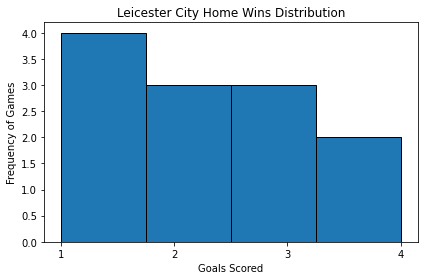

In [1424]:
lfc_home_win['home_team_goal'].plot.hist(bins=int(12/3),ec='black')
plt.xticks([1,2,3,4])
plt.xlabel('Goals Scored')
plt.ylabel('Frequency of Games')
plt.title('Leicester City Home Wins Distribution')
plt.tight_layout()

### Visualizing home wins versus away teams
The plot shows Leicester City wins versus the visiting teams and by how many goals they won the games. The stand-alone blue single bins indicate that the team did not concede any goals, also known as shutouts or clean sheets.

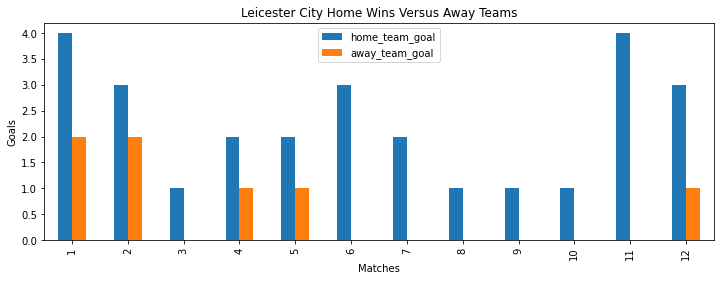

In [1406]:
lfc_home_win.index=range(1,13)
lfc_home_win.plot(kind='bar',figsize=(12,4))
plt.xlabel('Matches')
plt.ylabel('Goals')
plt.title('Leicester City Home Wins Versus Away Teams')
plt.show()

In [1408]:
# Filtering Leicester City's away wins
lfc_away_win = lfc_away_games[lfc_away_games['away_team_goal'] > lfc_away_games['home_team_goal']].sort_values(by='date', ascending=True)
# lfc_away_win.set_index(keys='match_api_id', inplace=True)
lfc_away_win = lfc_away_win[['home_team_goal', 'away_team_goal']]
lfc_away_win.style.hide_index()

home_team_goal,away_team_goal
1,2
1,2
2,3
0,3
0,3
2,3
0,1
1,3
0,1
0,1


In [1409]:
# Stats about the away wins
lfc_away_win.describe()

,home_team_goal,away_team_goal
count,11.000000,11.000000
mean,0.636364,2.181818
std,0.809040,0.873863
min,0.000000,1.000000
25%,0.000000,1.500000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,2.000000,3.000000


### Visualizing away wins distribution
The team's proportion of scoring at least two goals or more per game is high considering that the team was playing away from home.

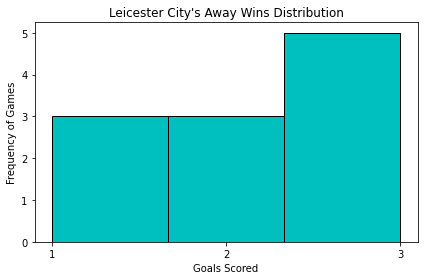

In [1442]:
lfc_away_win['away_team_goal'].plot.hist(bins=int(11/3),ec='black',color='c')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency of Games')
plt.title('Leicester City\'s Away Wins Distribution')
plt.xticks([1,2,3])
plt.tight_layout()

### Away Wins Observation
Leicester City's away wins were outstanding. Out of 11 wins, they were defensively strong as they won 6 games without allowing a single goal from their opponents.

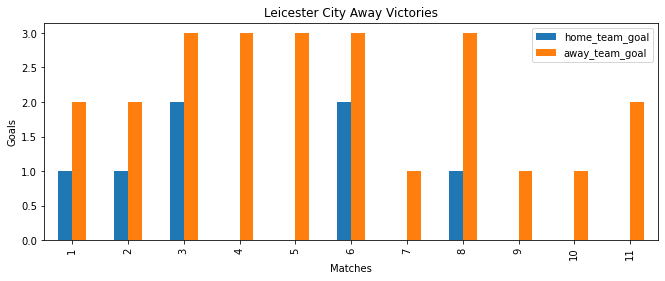

In [1413]:
# The away wins vs home teams plot
lfc_away_win.index=range(1,12)
lfc_away_win.plot(kind='bar',figsize=(11,4))
plt.title('Leicester City Away Victories')
plt.xlabel('Matches')
plt.ylabel('Goals')
plt.show()

<a id='conclusions'></a>
## Conclusions
It's stunning and memorable what the Leicester City Football Club was able to achieve in 2015/2016 despite being outside of winning odds<a href='https://www.nytimes.com/2016/05/01/sports/soccer/how-leicester-city-went-right-side-up.html'>(5000/1)</a>. But analyzing the club's overall season indicates that the team was able to perform at a consistent level throughout the season as both home and away record shows. There's no definitive conclusion as to wether the home or away wins became the defining factors in leading the team to the eventual championship. Even though the team recorded more victories at home that season, the away record was as much impressive and noteworthy.However, one factor to note is that the team was defensively outstanding.